# Projet : réaliser une étude sur les produits alimentaires

## 1 - Contexte

Vous réalisez une mission "UFC-Que Choisir". Cette association vous demande de réaliser une étude 
sur la qualité des produits alimentaires mis à disposition des consommateurs par les marques. Cette étude a vocation à aider les consommateurs dans leurs choix.

L'objectif est d'analyser les marques sur au moins les critères suivants : la qualité nutritionnelle, l'impact environnemental, la part des produits biologiques.


Pour cela, vous proposer d'utiliser les données de l'application Yuka

Voici une liste des questions que se pose l'association : 

- Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

- Quelles sont les marques qui ont le plus recours aux additifs nocifs

- Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

- Quelles sont les marques qui jouent le jeu et affichent l'ecosore ? Lesquelles ne le font pas?

- Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

- Quelles sont les marques qui proposent essentiellement des produits biologiques ?

- Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ? 

- Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

- Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

- Quelles marques faut-il recommander ? 

- Quelles marques ne faut-il surtout pas recommander ? 




## 2 - Données

3 fichiers issues de l'application Yuka sont à exploiter pour réaliser l'analyse. 


Agriculture_biologique_final.csv

Qualite nutritionnelle_final.csv

Impact environnemental_final.csv

Voici le lien pour récupérer les fichiers

# https://www.dropbox.com/sh/pwsv4coi2sbbhyo/AABJ81-xWu3K2Cl0DOCmwbGsa?dl=0

## 3 - Consignes

Travail de groupe de 3 personnes. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

## 4 - Contraintes

Votre analyse doit inclure des analyses univariées et multivariées


## 5 - Préparation de l'environnement

In [346]:
# Import des librairies
import pandas as pd
import numpy as np
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from plotly.subplots import make_subplots
import plotly.graph_objects as go

pd.set_option("display.max_columns", None)
sns.set()

In [2]:
bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)


In [3]:
#Les fonctions pour initialiser les DF

def bio_init():
    bio = pd.read_csv("Agriculture_biologique_final.csv", sep="\t")
    return bio
def env_init():
    env = pd.read_csv("Impact environnemental_final.csv", sep="\t", low_memory=False)
    return env
def quali_init():
    quali = pd.read_csv("Qualite nutritionnelle_final.csv", sep="\t", low_memory=False)
    return quali

In [224]:
quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


## 6 - A vous de jouer¶

Inspirez-vous du TP vu en cours

# Quelles sont les marques qui jouent le jeu et affichent le nutriscore ? Lesquelles ne le font pas?

In [25]:
nutri = quali.copy()
nutri = nutri[["brands_tags","nutriscore_grade"]]
nutri = nutri.groupby(by="brands_tags").nutriscore_grade.agg(["count"]).sort_values(by="count", ascending=False)
nutri

,count
brands_tags,
auchan,7030
carrefour,6499
u,4521
casino,3289
leader-price,3123
...,...
"knorr,unilever,knorr-schmeck-die-welt",0
"knorr,moments-gourmets,unilever",0
"knorr,knorr-professional",0


In [37]:
print("Le nombre de marque totale est :", nutri.index.nunique())
print("Ceci est une liste des marques qui affichent le nutriscore: \n", nutri[nutri["count"]>0])

Le nombre de marque totale est : 58298
Ceci est une liste des marques qui affichent le nutriscore: 
                                            count
brands_tags                                     
auchan                                      7030
carrefour                                   6499
u                                           4521
casino                                      3289
leader-price                                3123
...                                          ...
ape                                            1
signature-select,better-living-brands-llc      1
selection-des-mousquetaires                    1
silvia                                         1
ever-green                                     1

[33460 rows x 1 columns]


In [39]:
print("Le nombre de marque totale est :", nutri.index.nunique())
print("Ceci est une liste des marques qui n'affichent pas le nutriscore: \n", nutri[nutri["count"]==0])

Le nombre de marque totale est : 58298
Ceci est une liste des marques qui n'affichent pas le nutriscore: 
                                        count
brands_tags                                 
wahaha                                     0
olympuds                                   0
vin-bourgueil                              0
old-hop                                    0
vegetal-bion                               0
...                                      ...
knorr,unilever,knorr-schmeck-die-welt      0
knorr,moments-gourmets,unilever            0
knorr,knorr-professional                   0
knorr,knorq                                0
청정원,daesang                                0

[24838 rows x 1 columns]


([<matplotlib.patches.Wedge at 0x233c2420590>,
 [Text(1.0704500126544356, -0.25325238480243156, 'Avec NS'),
  Text(-1.0704499889432313, 0.2532524850251937, 'Sans NS')],
 [Text(0.5838818250842376, -0.1381376644376899, '57.4%'),
  Text(-0.5838818121508534, 0.1381377191046511, '42.6%')])

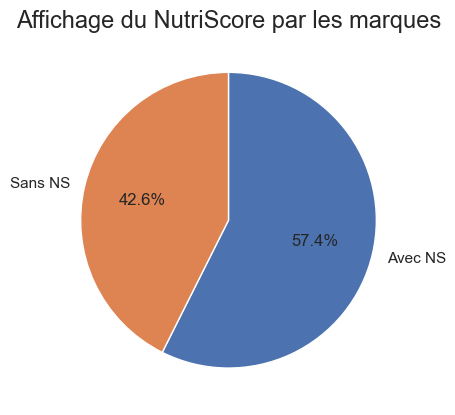

In [64]:
nutri_x = len(nutri[nutri["count"]>0])
nutri_y = len(nutri[nutri["count"]==0])

x = [nutri_x, nutri_y]
label =["Avec NS", "Sans NS"]

plt.title("Affichage du NutriScore par les marques", fontsize=17)

plt.pie(x, labels=label, counterclock=False, startangle=90, autopct="%1.1f%%")


# Quelles sont les marques qui ont le plus recours aux additifs nocifs

In [10]:
quali.nb_nocif.unique()

array([0., 1., 2.])

In [4]:
print("Il y a ", quali["nb_nocif"].isin([0.0]).sum(), " produit(s) sans additif nocif")
print("Il y a ", quali["nb_nocif"].isin([1.0]).sum(), " produit(s) avec 1 additif nocif")
print("Il y a ", quali["nb_nocif"].isin([2.0]).sum(), " produit(s) avec 2 additifs nocifs")

Il y a  932413  produit(s) sans additif nocif
Il y a  452  produit(s) avec 1 additif nocif
Il y a  1  produit(s) avec 2 additifs nocifs


In [227]:
#création nouveau DF
nocif_b = quali.copy()

#remplacer soit par inconnu soit par le nom du produit
nocif_b["brands_tags"] = nocif_b["brands_tags"].fillna(nocif_b["product_name"])

#calculer le nb de produits nocifs par marques pour les 10 plus nocifs
nocif = nocif_b.groupby(by="brands_tags").nb_nocif.agg([sum,"mean","count"]).sort_values(by="sum", ascending=False)[:10]
#calculer par pourcentage le nb de produits nocifs par marque
nocif["ratio"] = (nocif["sum"]/nocif["count"]*100).round(2)
nocif
#les classer par leur pourcentages(option)
# nocif.sort_values(by="ratio", ascending=False)
quali
#attention!!! si on fait count(), il affiche que la totale produits

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


<Axes: title={'center': '10 marques qui ont le plus recours aux additifs nocifs'}, xlabel='brands_tags'>

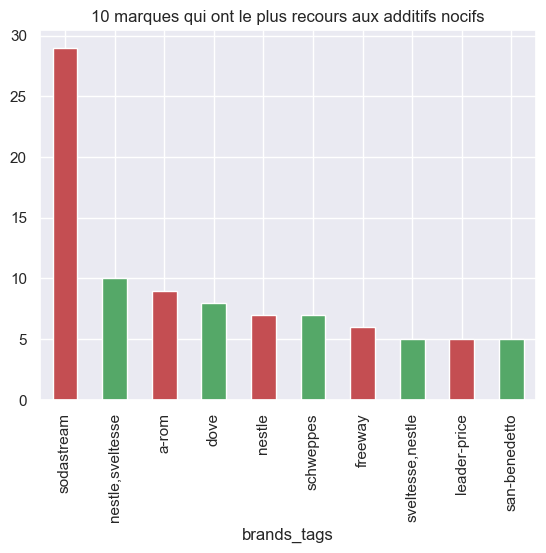

In [272]:
list_color = ["r", "g"]
nocif["sum"].plot.bar(title="10 marques qui ont le plus recours aux additifs nocifs", color=list_color)

# Quelles sont les marques qui présentent des produits avec la meilleure qualité nutritionnelle ? Les pires ?

In [75]:
quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,375.0,7.0,3.08,15.0,7.8,1.40,0.0
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,0000000000100,moutarde au moût de raisin,100g,courte-paille,en:france,NaN,https://images.openfoodfacts.org/images/produc...,fr:eau-graines-de-teguments-de-moutarde-vinaig...,d,NaN,8.2,2.20,22.0,5.1,4.60,0.0
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,21.0,0.0,0.00,0.4,0.2,2.04,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932862,9999992756068,Steak haché,500 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,196.0,14.0,6.20,0.0,19.0,0.19,0.0
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [289]:
#Créer un nouveau DF combiné

quali_temp = quali.copy()

#remplacer soit par inconnu soit par le nom du produit
quali_temp["brands_tags"] = quali_temp["brands_tags"].fillna(quali_temp["product_name"])


quali_temp.dropna(subset="nutriscore_grade", inplace=True)
quali_a = quali_temp[["brands_tags"]]

#get_dummies permets de transformer des données qualifiant sous forme bool
quali_b = pd.get_dummies(quali_temp.nutriscore_grade)

quali_marge = quali_a.join(quali_b)
quali_marge.dropna(inplace=True)


In [290]:
#transformer les bool aux ciffres
scores = {"a":5, "b":4, "c":3, "d":2, "e":1}
quali_marge['score_total'] = quali_marge[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores)), axis=1)

quali_trie = quali_marge.sort_values('score_total', ascending=False)
quali_trie


,brands_tags,a,b,c,d,e,score_total
0,danone,1,0,0,0,0,5
139255,garofalo,1,0,0,0,0,5
139216,"lustucru,panzani",1,0,0,0,0,5
418095,uncle-ben-s,1,0,0,0,0,5
418093,uncle-ben-s,1,0,0,0,0,5
...,...,...,...,...,...,...,...
444746,"betty-bossi,coop",0,0,0,0,1,1
128430,les-comtes-de-provence,0,0,0,0,1,1
444713,naturaplan,0,0,0,0,1,1
444710,"naturaplan,coop",0,0,0,0,1,1


In [328]:
top_NS = quali_trie.groupby(by="brands_tags").sum().sort_values(by="score_total", ascending=False).head(5)
top_NS
total_top = top_NS[["score_total"]]

#afficher top5 a -> e en points calculés
top_NS_points = top_NS.drop(columns="score_total")
top_NS_points[["a","b","c","d","e"]] = top_NS_points[["a","b","c","d","e"]].apply(lambda row:(row*pd.Series(scores)), axis =1)
top_NS_points


,a,b,c,d,e
brands_tags,,,,,
auchan,8350.0,4336.0,4455.0,3652.0,965.0
carrefour,6475.0,3780.0,3951.0,3770.0,1057.0
u,4885.0,2912.0,2805.0,2452.0,655.0
casino,3475.0,2128.0,2232.0,1738.0,449.0
leader-price,2645.0,2004.0,2163.0,1700.0,522.0


In [332]:
total_top

,score_total
brands_tags,
auchan,21758
carrefour,19033
u,13709
casino,10022
leader-price,9034


In [352]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=("Top 10 marques au NS", "Proportion de NS")
)

fig.add_trace(
    go.Bar(x=total_top.index, name="marques"),
    row=1, col=1
)

fig.add_trace(
    go.Layout(x=top_NS_points.index, histnorm="percent", name="marques"),
    row=1, col=2
)

fig.update_layout(
    xaxis=dict(title="marques"),
    yaxis=dict(title="totale"),
    bargap=0.2,
    bargroupgap=0.1
)

fig.update_layout(
    xaxis2=dict(title="marques"),
    yaxis2=dict(title="taux"),
    bargap=0.2,
    bargroupgap=0.1
)

fig.show()


ValueError: Invalid property specified for object of type plotly.graph_objs.Layout: 'x'

Did you mean "geo"?

    Valid properties:
        activeshape
            :class:`plotly.graph_objects.layout.Activeshape`
            instance or dict with compatible properties
        annotations
            A tuple of
            :class:`plotly.graph_objects.layout.Annotation`
            instances or dicts with compatible properties
        annotationdefaults
            When used in a template (as
            layout.template.layout.annotationdefaults), sets the
            default property values to use for elements of
            layout.annotations
        autosize
            Determines whether or not a layout width or height that
            has been left undefined by the user is initialized on
            each relayout. Note that, regardless of this attribute,
            an undefined layout width or height is always
            initialized on the first call to plot.
        autotypenumbers
            Using "strict" a numeric string in trace data is not
            converted to a number. Using *convert types* a numeric
            string in trace data may be treated as a number during
            automatic axis `type` detection. This is the default
            value; however it could be overridden for individual
            axes.
        bargap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        bargroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        barmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "relative", the bars
            are stacked on top of one another, with negative values
            below the axis, positive values above With "group", the
            bars are plotted next to one another centered around
            the shared location. With "overlay", the bars are
            plotted over one another, you might need to an
            "opacity" to see multiple bars.
        barnorm
            Sets the normalization for bar traces on the graph.
            With "fraction", the value of each bar is divided by
            the sum of all values at that location coordinate.
            "percent" is the same but multiplied by 100 to show
            percentages.
        boxgap
            Sets the gap (in plot fraction) between boxes of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        boxgroupgap
            Sets the gap (in plot fraction) between boxes of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        boxmode
            Determines how boxes at the same location coordinate
            are displayed on the graph. If "group", the boxes are
            plotted next to one another centered around the shared
            location. If "overlay", the boxes are plotted over one
            another, you might need to set "opacity" to see them
            multiple boxes. Has no effect on traces that have
            "width" set.
        calendar
            Sets the default calendar system to use for
            interpreting and displaying dates throughout the plot.
        clickmode
            Determines the mode of single click interactions.
            "event" is the default value and emits the
            `plotly_click` event. In addition this mode emits the
            `plotly_selected` event in drag modes "lasso" and
            "select", but with no event data attached (kept for
            compatibility reasons). The "select" flag enables
            selecting single data points via click. This mode also
            supports persistent selections, meaning that pressing
            Shift while clicking, adds to / subtracts from an
            existing selection. "select" with `hovermode`: "x" can
            be confusing, consider explicitly setting `hovermode`:
            "closest" when using this feature. Selection events are
            sent accordingly as long as "event" flag is set as
            well. When the "event" flag is missing, `plotly_click`
            and `plotly_selected` events are not fired.
        coloraxis
            :class:`plotly.graph_objects.layout.Coloraxis` instance
            or dict with compatible properties
        colorscale
            :class:`plotly.graph_objects.layout.Colorscale`
            instance or dict with compatible properties
        colorway
            Sets the default trace colors.
        computed
            Placeholder for exporting automargin-impacting values
            namely `margin.t`, `margin.b`, `margin.l` and
            `margin.r` in "full-json" mode.
        datarevision
            If provided, a changed value tells `Plotly.react` that
            one or more data arrays has changed. This way you can
            modify arrays in-place rather than making a complete
            new copy for an incremental change. If NOT provided,
            `Plotly.react` assumes that data arrays are being
            treated as immutable, thus any data array with a
            different identity from its predecessor contains new
            data.
        dragmode
            Determines the mode of drag interactions. "select" and
            "lasso" apply only to scatter traces with markers or
            text. "orbit" and "turntable" apply only to 3D scenes.
        editrevision
            Controls persistence of user-driven changes in
            `editable: true` configuration, other than trace names
            and axis titles. Defaults to `layout.uirevision`.
        extendfunnelareacolors
            If `true`, the funnelarea slice colors (whether given
            by `funnelareacolorway` or inherited from `colorway`)
            will be extended to three times its original length by
            first repeating every color 20% lighter then each color
            20% darker. This is intended to reduce the likelihood
            of reusing the same color when you have many slices,
            but you can set `false` to disable. Colors provided in
            the trace, using `marker.colors`, are never extended.
        extendiciclecolors
            If `true`, the icicle slice colors (whether given by
            `iciclecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendpiecolors
            If `true`, the pie slice colors (whether given by
            `piecolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendsunburstcolors
            If `true`, the sunburst slice colors (whether given by
            `sunburstcolorway` or inherited from `colorway`) will
            be extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        extendtreemapcolors
            If `true`, the treemap slice colors (whether given by
            `treemapcolorway` or inherited from `colorway`) will be
            extended to three times its original length by first
            repeating every color 20% lighter then each color 20%
            darker. This is intended to reduce the likelihood of
            reusing the same color when you have many slices, but
            you can set `false` to disable. Colors provided in the
            trace, using `marker.colors`, are never extended.
        font
            Sets the global font. Note that fonts used in traces
            and other layout components inherit from the global
            font.
        funnelareacolorway
            Sets the default funnelarea slice colors. Defaults to
            the main `colorway` used for trace colors. If you
            specify a new list here it can still be extended with
            lighter and darker colors, see
            `extendfunnelareacolors`.
        funnelgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        funnelgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        funnelmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "stack", the bars are
            stacked on top of one another With "group", the bars
            are plotted next to one another centered around the
            shared location. With "overlay", the bars are plotted
            over one another, you might need to an "opacity" to see
            multiple bars.
        geo
            :class:`plotly.graph_objects.layout.Geo` instance or
            dict with compatible properties
        grid
            :class:`plotly.graph_objects.layout.Grid` instance or
            dict with compatible properties
        height
            Sets the plot's height (in px).
        hiddenlabels
            hiddenlabels is the funnelarea & pie chart analog of
            visible:'legendonly' but it can contain many labels,
            and can simultaneously hide slices from several
            pies/funnelarea charts
        hiddenlabelssrc
            Sets the source reference on Chart Studio Cloud for
            `hiddenlabels`.
        hidesources
            Determines whether or not a text link citing the data
            source is placed at the bottom-right cored of the
            figure. Has only an effect only on graphs that have
            been generated via forked graphs from the Chart Studio
            Cloud (at https://chart-studio.plotly.com or on-
            premise).
        hoverdistance
            Sets the default distance (in pixels) to look for data
            to add hover labels (-1 means no cutoff, 0 means no
            looking for data). This is only a real distance for
            hovering on point-like objects, like scatter points.
            For area-like objects (bars, scatter fills, etc)
            hovering is on inside the area and off outside, but
            these objects will not supersede hover on point-like
            objects in case of conflict.
        hoverlabel
            :class:`plotly.graph_objects.layout.Hoverlabel`
            instance or dict with compatible properties
        hovermode
            Determines the mode of hover interactions. If
            "closest", a single hoverlabel will appear for the
            "closest" point within the `hoverdistance`. If "x" (or
            "y"), multiple hoverlabels will appear for multiple
            points at the "closest" x- (or y-) coordinate within
            the `hoverdistance`, with the caveat that no more than
            one hoverlabel will appear per trace. If *x unified*
            (or *y unified*), a single hoverlabel will appear
            multiple points at the closest x- (or y-) coordinate
            within the `hoverdistance` with the caveat that no more
            than one hoverlabel will appear per trace. In this
            mode, spikelines are enabled by default perpendicular
            to the specified axis. If false, hover interactions are
            disabled.
        iciclecolorway
            Sets the default icicle slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendiciclecolors`.
        images
            A tuple of :class:`plotly.graph_objects.layout.Image`
            instances or dicts with compatible properties
        imagedefaults
            When used in a template (as
            layout.template.layout.imagedefaults), sets the default
            property values to use for elements of layout.images
        legend
            :class:`plotly.graph_objects.layout.Legend` instance or
            dict with compatible properties
        mapbox
            :class:`plotly.graph_objects.layout.Mapbox` instance or
            dict with compatible properties
        margin
            :class:`plotly.graph_objects.layout.Margin` instance or
            dict with compatible properties
        meta
            Assigns extra meta information that can be used in
            various `text` attributes. Attributes such as the
            graph, axis and colorbar `title.text`, annotation
            `text` `trace.name` in legend items, `rangeselector`,
            `updatemenus` and `sliders` `label` text all support
            `meta`. One can access `meta` fields using template
            strings: `%{meta[i]}` where `i` is the index of the
            `meta` item in question. `meta` can also be an object
            for example `{key: value}` which can be accessed
            %{meta[key]}.
        metasrc
            Sets the source reference on Chart Studio Cloud for
            `meta`.
        modebar
            :class:`plotly.graph_objects.layout.Modebar` instance
            or dict with compatible properties
        newshape
            :class:`plotly.graph_objects.layout.Newshape` instance
            or dict with compatible properties
        paper_bgcolor
            Sets the background color of the paper where the graph
            is drawn.
        piecolorway
            Sets the default pie slice colors. Defaults to the main
            `colorway` used for trace colors. If you specify a new
            list here it can still be extended with lighter and
            darker colors, see `extendpiecolors`.
        plot_bgcolor
            Sets the background color of the plotting area in-
            between x and y axes.
        polar
            :class:`plotly.graph_objects.layout.Polar` instance or
            dict with compatible properties
        scene
            :class:`plotly.graph_objects.layout.Scene` instance or
            dict with compatible properties
        selectdirection
            When `dragmode` is set to "select", this limits the
            selection of the drag to horizontal, vertical or
            diagonal. "h" only allows horizontal selection, "v"
            only vertical, "d" only diagonal and "any" sets no
            limit.
        selectionrevision
            Controls persistence of user-driven changes in selected
            points from all traces.
        separators
            Sets the decimal and thousand separators. For example,
            *. * puts a '.' before decimals and a space between
            thousands. In English locales, dflt is ".," but other
            locales may alter this default.
        shapes
            A tuple of :class:`plotly.graph_objects.layout.Shape`
            instances or dicts with compatible properties
        shapedefaults
            When used in a template (as
            layout.template.layout.shapedefaults), sets the default
            property values to use for elements of layout.shapes
        showlegend
            Determines whether or not a legend is drawn. Default is
            `true` if there is a trace to show and any of these: a)
            Two or more traces would by default be shown in the
            legend. b) One pie trace is shown in the legend. c) One
            trace is explicitly given with `showlegend: true`.
        sliders
            A tuple of :class:`plotly.graph_objects.layout.Slider`
            instances or dicts with compatible properties
        sliderdefaults
            When used in a template (as
            layout.template.layout.sliderdefaults), sets the
            default property values to use for elements of
            layout.sliders
        smith
            :class:`plotly.graph_objects.layout.Smith` instance or
            dict with compatible properties
        spikedistance
            Sets the default distance (in pixels) to look for data
            to draw spikelines to (-1 means no cutoff, 0 means no
            looking for data). As with hoverdistance, distance does
            not apply to area-like objects. In addition, some
            objects can be hovered on but will not generate
            spikelines, such as scatter fills.
        sunburstcolorway
            Sets the default sunburst slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendsunburstcolors`.
        template
            Default attributes to be applied to the plot. This
            should be a dict with format: `{'layout':
            layoutTemplate, 'data': {trace_type: [traceTemplate,
            ...], ...}}` where `layoutTemplate` is a dict matching
            the structure of `figure.layout` and `traceTemplate` is
            a dict matching the structure of the trace with type
            `trace_type` (e.g. 'scatter'). Alternatively, this may
            be specified as an instance of
            plotly.graph_objs.layout.Template.  Trace templates are
            applied cyclically to traces of each type. Container
            arrays (eg `annotations`) have special handling: An
            object ending in `defaults` (eg `annotationdefaults`)
            is applied to each array item. But if an item has a
            `templateitemname` key we look in the template array
            for an item with matching `name` and apply that
            instead. If no matching `name` is found we mark the
            item invisible. Any named template item not referenced
            is appended to the end of the array, so this can be
            used to add a watermark annotation or a logo image, for
            example. To omit one of these items on the plot, make
            an item with matching `templateitemname` and `visible:
            false`.
        ternary
            :class:`plotly.graph_objects.layout.Ternary` instance
            or dict with compatible properties
        title
            :class:`plotly.graph_objects.layout.Title` instance or
            dict with compatible properties
        titlefont
            Deprecated: Please use layout.title.font instead. Sets
            the title font. Note that the title's font used to be
            customized by the now deprecated `titlefont` attribute.
        transition
            Sets transition options used during Plotly.react
            updates.
        treemapcolorway
            Sets the default treemap slice colors. Defaults to the
            main `colorway` used for trace colors. If you specify a
            new list here it can still be extended with lighter and
            darker colors, see `extendtreemapcolors`.
        uirevision
            Used to allow user interactions with the plot to
            persist after `Plotly.react` calls that are unaware of
            these interactions. If `uirevision` is omitted, or if
            it is given and it changed from the previous
            `Plotly.react` call, the exact new figure is used. If
            `uirevision` is truthy and did NOT change, any
            attribute that has been affected by user interactions
            and did not receive a different value in the new figure
            will keep the interaction value. `layout.uirevision`
            attribute serves as the default for `uirevision`
            attributes in various sub-containers. For finer control
            you can set these sub-attributes directly. For example,
            if your app separately controls the data on the x and y
            axes you might set `xaxis.uirevision=*time*` and
            `yaxis.uirevision=*cost*`. Then if only the y data is
            changed, you can update `yaxis.uirevision=*quantity*`
            and the y axis range will reset but the x axis range
            will retain any user-driven zoom.
        uniformtext
            :class:`plotly.graph_objects.layout.Uniformtext`
            instance or dict with compatible properties
        updatemenus
            A tuple of
            :class:`plotly.graph_objects.layout.Updatemenu`
            instances or dicts with compatible properties
        updatemenudefaults
            When used in a template (as
            layout.template.layout.updatemenudefaults), sets the
            default property values to use for elements of
            layout.updatemenus
        violingap
            Sets the gap (in plot fraction) between violins of
            adjacent location coordinates. Has no effect on traces
            that have "width" set.
        violingroupgap
            Sets the gap (in plot fraction) between violins of the
            same location coordinate. Has no effect on traces that
            have "width" set.
        violinmode
            Determines how violins at the same location coordinate
            are displayed on the graph. If "group", the violins are
            plotted next to one another centered around the shared
            location. If "overlay", the violins are plotted over
            one another, you might need to set "opacity" to see
            them multiple violins. Has no effect on traces that
            have "width" set.
        waterfallgap
            Sets the gap (in plot fraction) between bars of
            adjacent location coordinates.
        waterfallgroupgap
            Sets the gap (in plot fraction) between bars of the
            same location coordinate.
        waterfallmode
            Determines how bars at the same location coordinate are
            displayed on the graph. With "group", the bars are
            plotted next to one another centered around the shared
            location. With "overlay", the bars are plotted over one
            another, you might need to an "opacity" to see multiple
            bars.
        width
            Sets the plot's width (in px).
        xaxis
            :class:`plotly.graph_objects.layout.XAxis` instance or
            dict with compatible properties
        yaxis
            :class:`plotly.graph_objects.layout.YAxis` instance or
            dict with compatible properties
        
Did you mean "geo"?

Bad property path:
x
^

In [306]:
plot_dataset = pd.DataFrame(index = top_NS.index)
for col in top_NS.columns:
    plot_dataset[col] = round(100 * top_NS[col] / top_NS[col].sum(), 1)
    
plot_dataset

,a,b,c,d,e
brands_tags,,,,,
auchan,32.3,28.6,28.5,27.4,26.5
carrefour,25.1,24.9,25.3,28.3,29.0
u,18.9,19.2,18.0,18.4,18.0
casino,13.5,14.0,14.3,13.1,12.3
leader-price,10.2,13.2,13.9,12.8,14.3


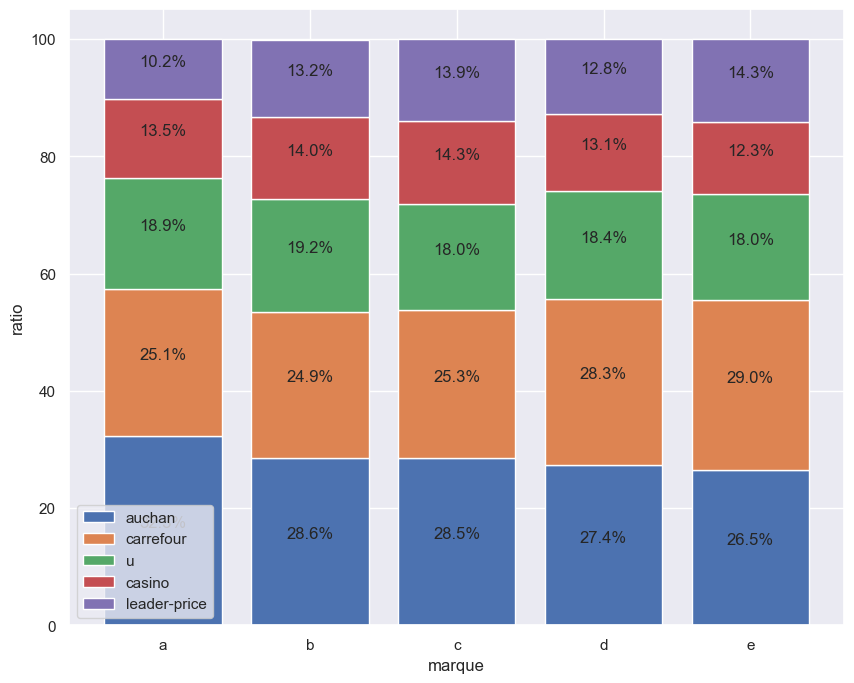

In [310]:
fig, ax = plt.subplots(figsize=(10, 8))
for i in range(len(plot_dataset)):
    ax.bar(plot_dataset.columns, 
           plot_dataset.iloc[i], 
           bottom=plot_dataset.iloc[:i].sum()
          )
    for j in range(len(plot_dataset.columns)):
        plt.text(x=j, 
                 y=plot_dataset.iloc[:i, j].sum()+(plot_dataset.iloc[i, j]/2), 
                 s=f'{plot_dataset.iloc[i, j]}%', 
                 ha='center', 
                 va='bottom'
                )
ax.set(xlabel="marque", ylabel="ratio")
ax.legend(plot_dataset.index)
plt.show()



In [177]:
worst_NS = quali_trie.groupby(by="brands_tags").sum()
count_product = worst_NS.a+worst_NS.b+worst_NS.c+worst_NS.d+worst_NS.e
worst_NS = worst_NS[count_product>250].sort_values(by="score_total", ascending=True).head(5)
worst_NS

,a,b,c,d,e,score_total
brands_tags,,,,,,
milka,0,0,2,22,272,322
larnaudie,14,18,15,24,183,418
le-comptoir-de-mathilde,0,2,37,115,123,472
president,1,6,19,164,68,482
lindt,0,0,0,12,491,515


<Axes: title={'center': '...Et les pire!'}, xlabel='brands_tags'>

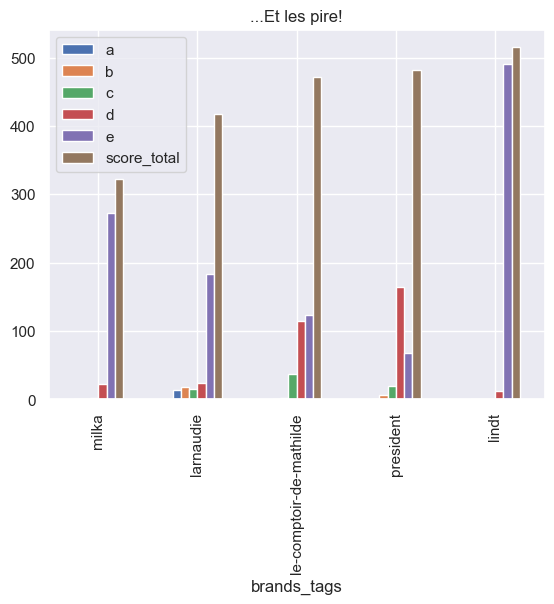

In [180]:
worst_NS.plot.bar(title="...Et les pire!")

# Quelles sont les marques qui semblent le plus respectueuses de l'environnement ? le moins?

In [188]:
env.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 932866 entries, 0 to 932865
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   code            932866 non-null  object
 1   product_name    907007 non-null  object
 2   quantity        279260 non-null  object
 3   brands_tags     463922 non-null  object
 4   countries_tags  932866 non-null  object
 5   serving_size    89842 non-null   object
 6   image_url       842701 non-null  object
 7   ecoscore_grade  931887 non-null  object
 8   est_plastique   932866 non-null  bool  
 9   est_palm        932866 non-null  bool  
 10  est_cocoa       932866 non-null  bool  
dtypes: bool(3), object(8)
memory usage: 59.6+ MB


In [185]:
env.ecoscore_grade.unique()

array(['d', 'unknown', 'c', 'e', 'b', 'not-applicable', 'a', nan],
      dtype=object)

In [189]:
env[env.ecoscore_grade.isin(['unknown','not-applicable'])]

,code,product_name,quantity,brands_tags,countries_tags,serving_size,image_url,ecoscore_grade,est_plastique,est_palm,est_cocoa
1,0000000000017,Vitória crackers,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
2,0000000000031,Cacao,130 g,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
4,0000000000123,Sauce Sweety chili 0%,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
5,0000000000178,Mini coco,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
6,0000000000208,Pistou d'ail des ours,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
932859,9999991087217,Pastilles à l'eau de lourdes,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
932861,9999991953895,Crème de Marrons,NaN,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
932863,9999992756112,Steak haché,1 kg,NaN,en:france,NaN,https://images.openfoodfacts.org/images/produc...,unknown,False,False,False
932864,999999999,Thé noir BIO Darjeeling,NaN,pages,en:france,NaN,NaN,unknown,False,False,False


In [190]:
env_temp = env.copy()
env_temp = env_temp[env.ecoscore_grade.isin(["a","b","c","d","e"])]


#remplacer soit par inconnu soit par le nom du produit
env_temp["brands_tags"] = env_temp["brands_tags"].fillna(env_temp["product_name"])


env_temp.dropna(subset="ecoscore_grade", inplace=True)
env_a = env_temp[["brands_tags"]]

#get_dummies permets de transformer des données qualifiant sous forme bool
env_b = pd.get_dummies(env_temp.ecoscore_grade)

env_marge = env_a.join(env_b)
env_marge.dropna(inplace=True)
env_marge

,brands_tags,a,b,c,d,e
0,danone,0,0,0,1,0
3,courte-paille,0,0,1,0,0
8,Pate d'amande,0,0,0,0,1
9,Salade de carottes râpées,0,1,0,0,0
22,crous,0,1,0,0,0
...,...,...,...,...,...,...
932843,Confiture de pêche,0,1,0,0,0
932844,Jus de pomme trouble,0,0,1,0,0
932858,Riz au lait,0,1,0,0,0
932860,Pain d’epices,0,1,0,0,0


In [191]:
#transformer les bool aux ciffres
scores_env = {"a":5, "b":4, "c":3, "d":2, "e":1}
env_marge['score_total'] = env_marge[['a', 'b', 'c', 'd', 'e']].apply(lambda row: sum(row * pd.Series(scores_env)), axis=1)

env_trie = env_marge.sort_values('score_total', ascending=False)
env_trie


,brands_tags,a,b,c,d,e,score_total
296807,auchan,1,0,0,0,0,5
384992,hipp,1,0,0,0,0,5
309686,lustucru,1,0,0,0,0,5
309687,lustucru,1,0,0,0,0,5
309691,lustucru,1,0,0,0,0,5
...,...,...,...,...,...,...,...
353888,carrefour,0,0,0,0,1,1
353860,Noix de cajou Grillée,0,0,0,0,1,1
353845,Huile de noisette,0,0,0,0,1,1
353840,Huile de noix,0,0,0,0,1,1


In [192]:
top_ES = env_trie.groupby(by="brands_tags").sum().sort_values(by="score_total", ascending=False).head(5)
top_ES

,a,b,c,d,e,score_total
brands_tags,,,,,,
auchan,379,1830,1261,1771,1255,17795
carrefour,411,1646,1282,1900,1328,17613
u,401,1147,1156,905,606,12477
casino,174,852,636,763,492,8204
leader-price,162,788,569,829,479,7806


<Axes: title={'center': 'Top 5 marques au Ecoscore'}, xlabel='brands_tags'>

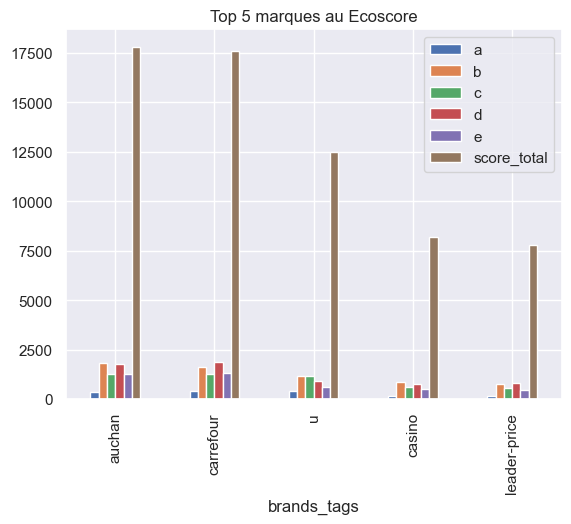

In [194]:
top_ES.plot.bar(title="Top 5 marques au Ecoscore")

In [195]:
worst_ES = quali_trie.groupby(by="brands_tags").sum()
count_product = worst_ES.a+worst_ES.b+worst_ES.c+worst_ES.d+worst_ES.e
worst_ES = worst_ES[count_product>250].sort_values(by="score_total", ascending=True).head(5)
worst_ES

,a,b,c,d,e,score_total
brands_tags,,,,,,
milka,0,0,2,22,272,322
larnaudie,14,18,15,24,183,418
le-comptoir-de-mathilde,0,2,37,115,123,472
president,1,6,19,164,68,482
lindt,0,0,0,12,491,515


<Axes: title={'center': '...Et les pire!'}, xlabel='brands_tags'>

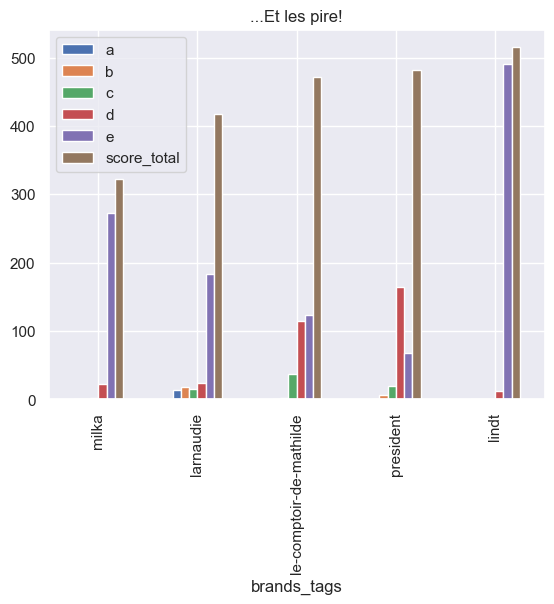

In [196]:
worst_ES.plot.bar(title="...Et les pire!")

# Quelles sont les marques qui proposent essentiellement des produits biologiques ?

In [197]:
bio

,product_name,brands_tags,serving_size,est_bio
0,Skyr,danone,NaN,False
1,moutarde au moût de raisin,courte-paille,NaN,False
2,Solène céréales poulet,crous,NaN,False
3,Tarte noix de coco,"crous-resto,crous",NaN,False
4,Crème dessert chocolat,ferme-de-la-fremondiere,NaN,False
...,...,...,...,...
463917,Saveur ABRICIT,gerble,NaN,False
463918,Lindt pâte à tartiner,lindt,NaN,False
463919,Biodrink antioxydant pendant effort,punch-power,NaN,True
463920,miel de fleurs sauvage,miellerie-de-la-natouze,NaN,False


In [198]:
bio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463922 entries, 0 to 463921
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   product_name  456563 non-null  object
 1   brands_tags   463922 non-null  object
 2   serving_size  86178 non-null   object
 3   est_bio       463922 non-null  bool  
dtypes: bool(1), object(3)
memory usage: 11.1+ MB


In [245]:
bio_tem = bio.copy()
bio_tem = bio_tem[["brands_tags","est_bio"]]



bio_ratio = bio_tem.groupby(by="brands_tags").est_bio.agg([sum,"count"]).sort_values("sum", ascending=False)
bio_ratio["ratio%"] = bio_ratio["sum"]/bio_ratio["count"]*100

ind2 = bio_ratio[bio_ratio["count"] <500].index
bio_ratio.drop(ind2, inplace = True)

bio_ratio = bio_ratio.sort_values("ratio%", ascending=False).head(10)
bio_ratio

,sum,count,ratio%
brands_tags,,,
"carrefour-bio,carrefour",539,542,99.446494
"u-bio,u",610,618,98.705502
"bio-village,marque-repere",852,866,98.383372
biocoop,768,828,92.753623
bonneterre,552,616,89.610390
bio-village,947,1060,89.339623
primeal,648,728,89.010989
moulin-des-moines,792,892,88.789238
la-vie-claire,1938,2187,88.614540


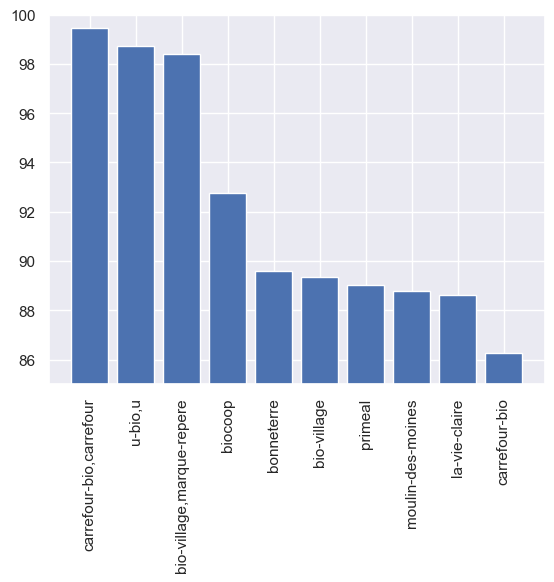

In [270]:
b_ratio_plot = bio_ratio[["ratio%"]]
fig, ax = plt.subplots()
bio_x = bio_ratio.index
bio_y = bio_ratio["ratio%"]
ax.set_ylim(85,100)
plt.xticks(rotation=90)

ax.bar(bio_x, bio_y)


plt.show()

# Observe-t-on une corrélation entre le caratère bio des produits et la qualité nutritionnelle ?

In [248]:
quali["nutriscore_A"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "a"]
quali["nutriscore_B"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "b"]
quali["nutriscore_C"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "c"]
quali["nutriscore_D"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "d"]
quali["nutriscore_E"] = quali["nutriscore_grade"].loc[quali["nutriscore_grade"] == "e"]

In [249]:
correl_bio_quali = quali.merge(bio, how= "inner", on= ["brands_tags","product_name"], indicator = "merge")
correl_bio_quali

,code,product_name,quantity,brands_tags,countries_tags,serving_size_x,image_url,ingredients_tags,nutriscore_grade,energy-kcal_100g,fat_100g,saturated-fat_100g,sugars_100g,proteins_100g,salt_100g,nb_nocif,nutriscore_A,nutriscore_B,nutriscore_C,nutriscore_D,nutriscore_E,serving_size_y,est_bio,merge
0,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,NaN,False,both
1,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,140g,False,both
2,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,NaN,False,both
3,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,NaN,False,both
4,00000000000026772226,Skyr,480 g,danone,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,a,57.0,0.2,0.10,3.9,10.0,0.09,0.0,a,NaN,NaN,NaN,NaN,1 pot (140g),False,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1741499,996299394093,Nutra'cake framboise,NaN,delical,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,381.0,12.7,6.70,29.0,15.6,0.80,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False,both
1741500,997046,Chocolat noir patissier,NaN,monoprix-bio,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,578.0,39.0,24.00,46.0,5.1,0.00,0.0,NaN,NaN,NaN,NaN,NaN,NaN,True,both
1741501,998042,Saveur ABRICIT,NaN,gerble,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,45.0,1.8,0.01,1.5,9.7,0.13,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False,both
1741502,9990000,Lindt pâte à tartiner,NaN,lindt,en:france,NaN,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,False,both


In [251]:
# Regardons la distibution si les variables étaient complétement independantes
# Création de ma table de contingence
X = "nutriscore_grade"
Y = "est_bio"

cont_1 = correl_bio_quali[[X,Y]].dropna().pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont_1

tx = cont_1.loc[:,["Total"]]
ty = cont_1.loc[["Total"],:]
n = len(correl_bio_quali[[X,Y]].dropna())
indep = (tx.dot(ty) / n)
indep

est_bio,False,True,Total
nutriscore_grade,,,
a,135893.521695,15380.478305,151274.0
b,82438.572342,9330.427658,91769.0
c,100119.444759,11331.555241,111451.0
d,131344.393664,14865.606336,146210.0
e,70789.067540,8011.932460,78801.0
Total,520585.000000,58920.000000,579505.0


# Observe-t-on une corrélation entre le caratère bio des produits et l'aspect envionnemental ?

# Observe-t-on une corrélation entre la la qualité nutritionnelle et l'aspec envionnemental ?

# Quelles marques faut-il recommander ?

# Quelles marques ne faut-il surtout pas recommander ?